In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly import tools
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from string import ascii_letters
from scipy.stats import norm,skew
from scipy.stats.stats import pearsonr
from scipy import stats
pl.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('H1N1_Flu_Vaccines.csv')
pd.set_option('display.max_columns',None)
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [3]:
original_df=df.copy()


In [4]:
charge_dist=df['h1n1_vaccine'].values

logcharge=np.log(df['h1n1_vaccine'])


C:\Users\rissu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



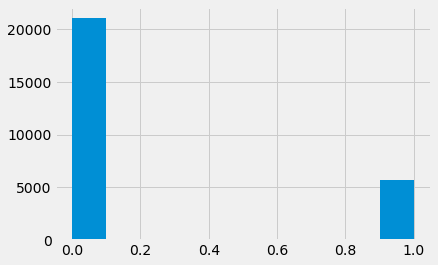

In [5]:
pl.hist(charge_dist)
pl.show()

In [6]:
trace0=go.Histogram(x=charge_dist,
                   histnorm='probability',
                   name='H1N1 Vaccine Distribution',
                   marker=dict(color='#FA5858'))

trace1=go.Histogram(x=logcharge,
                   histnorm='probability',
                   name='H1N1 Vaccine distribution using Log',
                   marker={'color':'#58FA82'})

fig=tools.make_subplots(rows=1,cols=2,subplot_titles=('H1N1 Vaccine Distribution',
                                                      'Log H1N1 Vaccine Distribution'),
                                                       print_grid=False
                                                       )
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.update_layout(showlegend=True,title='H1N1 Vaccine distributions',
                 bargap=0.05,legend=dict(
    yanchor="bottom",
    xanchor="center",
    x=0.5,y=0.9
)
                 )

# fig.show()
iplot(fig,filename='custom_subplots')

C:\Users\rissu\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [7]:
seasonal_vacc=df['seasonal_vaccine'].values
logcharge=np.log(df['seasonal_vaccine'])

trace0=go.Histogram(x=seasonal_vacc,histnorm='probability',name='Seasonal Vaccine Distribution')

trace1=go.Histogram(x=logcharge,histnorm='probability',
                   name='Log Seasonal Vaccine Distribution')

fig=tools.make_subplots(rows=2,cols=1,
                       subplot_titles=('Sesonal Vaccine Distribution',
                                      'Log Seasonal Vaccine Distribution'))
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,2,1)
fig.update_layout(bargap=0.1)
fig.show()





C:\Users\rissu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [8]:
#List of catgorical values
cat_vals=df.dtypes[df.dtypes=='object']
cat_vals

age_group                object
education                object
race                     object
sex                      object
income_poverty           object
marital_status           object
rent_or_own              object
employment_status        object
hhs_geo_region           object
census_msa               object
employment_industry      object
employment_occupation    object
dtype: object

In [9]:
df[cat_vals.keys()].isnull().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

In [10]:
for feature in cat_vals.keys():
    df[feature]=df[feature].fillna('None')
    

In [11]:
numeric_vals=df.dtypes[df.dtypes!='object']
numeric_vals

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
h1n1_vaccine                     int64
seasonal_vaccine         

In [12]:
df[numeric_vals.keys()].isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [13]:
for feature in numeric_vals.keys():
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)


In [14]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [15]:
chronic=[df['chronic_med_condition'].values.tolist()]
group_labels=['Chronic Medical Condition Distribution']
colors=['#FA5858']
fig=ff.create_distplot(chronic,group_labels,colors=colors)
fig.update_layout(title='Normal Distribution <br> Central Limit Theorem Condition')
iplot(fig)

In [16]:
corr=df.corr()
heatmap=go.Heatmap(z=corr.values,
           x=corr.index.values.tolist(),
           y=corr.index.values.tolist())
data=[heatmap]
layout=go.Layout(title='Correlation Heatmap')
fig=dict(data=data,layout=layout)
iplot(fig)

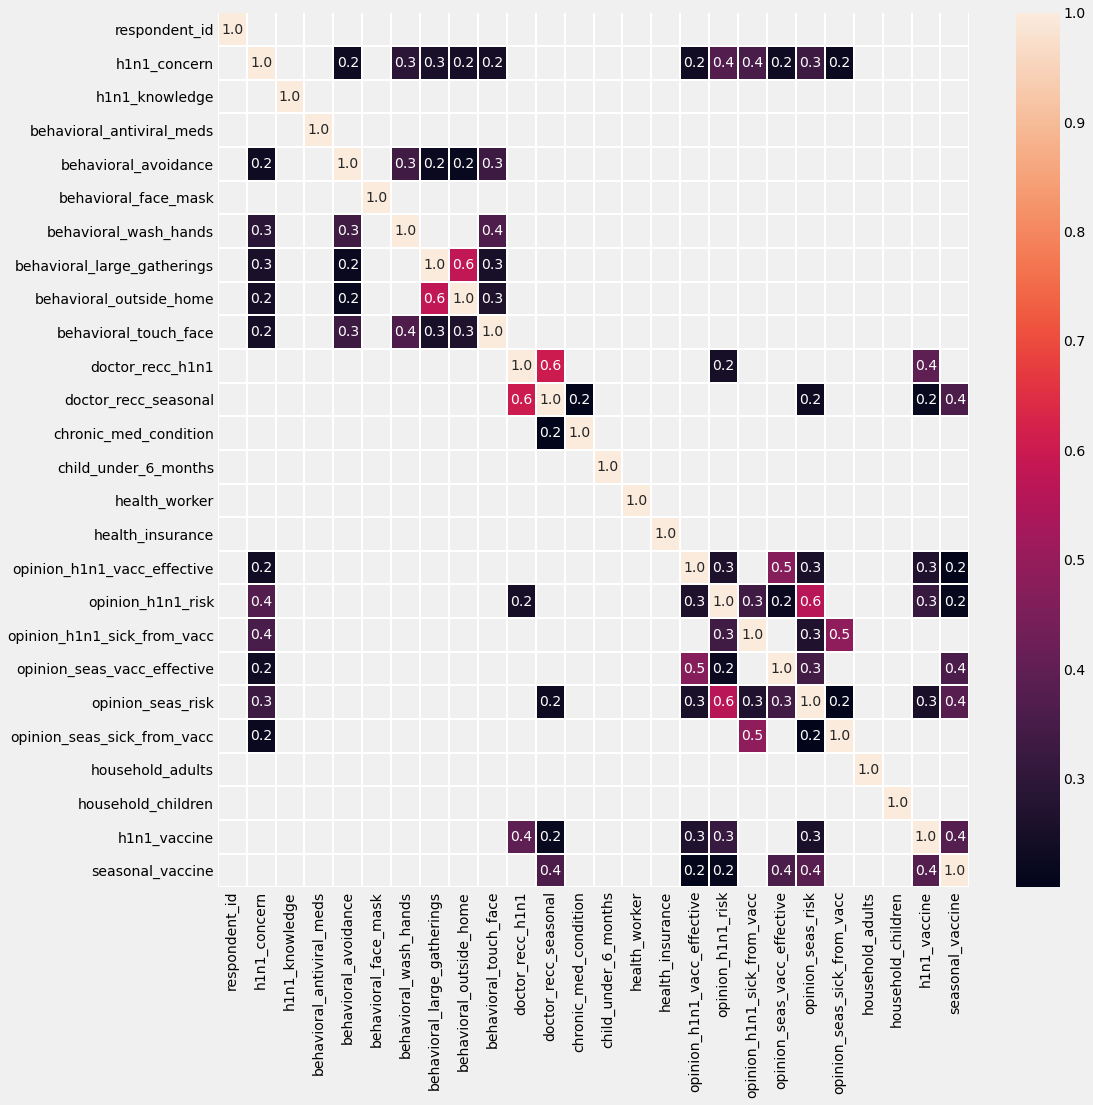

In [17]:
pl.figure(figsize=(15,15))
sns.heatmap(corr[corr>0.2],annot=True,fmt='0.1f',linewidth=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='float16' or df[c].dtype=='float32' or df[c].dtype=='float64':
        df[c].fillna(df[c].mean())
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               1.0                          3.0                1.0   
3               1.0                          3.0                3.0   
4               1.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [19]:
for f in df.columns:
    if df[f].dtype=='object':
        lbl=LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f]=lbl.transform(list(df[f].values))
print('Done')

Done


In [20]:
df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               1.0                          3.0                1.0   
3               1.0                          3.0                3.0   
4               1.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  age_group  education  race  \
0                1.0                          2.0          3          1     3   
1                2.0                          4.0          1          0     3   
2                1.0                          2.0          0          2     3   
3                4.0                          1.0          4          0     3   
4                1.0                          4.0          2          4     3   

   sex  income_poverty  marital_status  rent_or_own  employment_status  \
0    0               2               2            1                  2   
1    1               2               2            2                  0   
2    1               0               2            1                  0   
3    0               2               2            2                  2   
4    0               0               0            1                  0   

   hhs_geo_region  census_msa  household_adults  household_children  \
0               8           2               0.0                 0.0   
1               1           0               0.0                 0.0   
2

In [21]:
df_=pd.get_dummies(df)

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore_lm=ols("age_group ~ income_poverty",data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:              age_group   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.68
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.92e-06
Time:                        20:10:08   Log-Likelihood:                -47942.
No. Observations:               26707   AIC:                         9.589e+04
Df Residuals:                   26705   BIC:                         9.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2225      0.012    189.

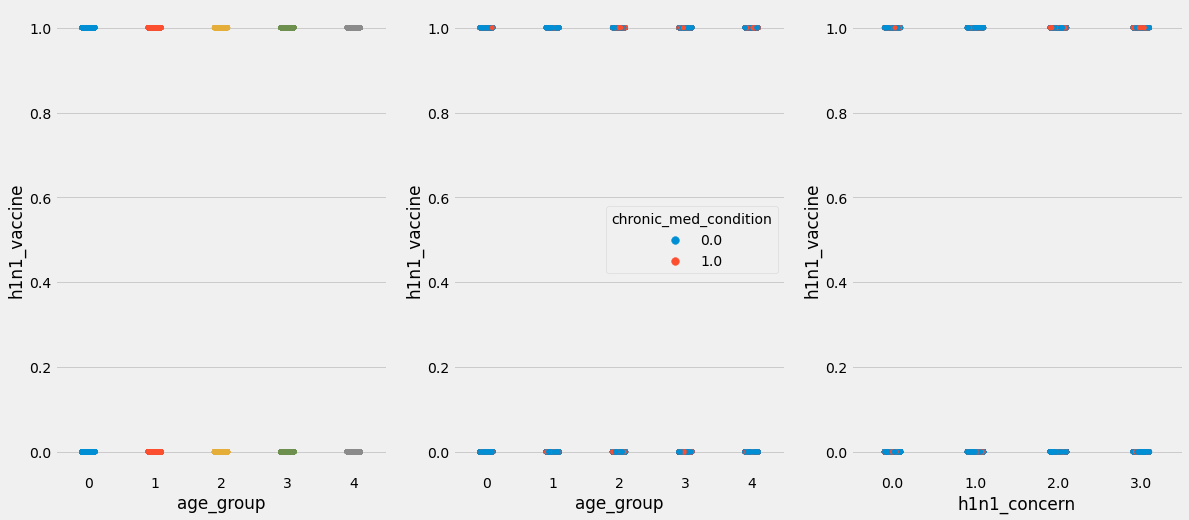

In [24]:
f,(ax1,ax2,ax3)=pl.subplots(ncols=3,figsize=(18,8))
sns.stripplot(x='age_group',y='h1n1_vaccine',data=df,ax=ax1)
sns.stripplot(x='age_group',y='h1n1_vaccine',data=df,ax=ax2,hue='chronic_med_condition')
sns.stripplot(x='h1n1_concern',y='h1n1_vaccine',data=df,ax=ax3,hue='chronic_med_condition')
ax3.legend_.remove()
pl.show()